### Setting up the data (10 points)

The following is the snippet of code to load the datasets, and split it into train and validation data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import warnings
# warnings.filterwarnings("ignore")
np.random.seed(0)

# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

def print_info(X, name):
    for i in range(X.shape[1]):
        print(i + 1)
        print(name + " min is:", np.min(X[:, i]), name + " max is:", np.max(X[:, i]))
        print(name + " mean is:",np.mean(X[:,i]), name + " variance is:",np.var(X[:,i]))


In [2]:
# 1.1
print_info(X, '')

1
 min is: 193.5  max is: 253.0
 mean is: 241.6011037  variance is: 83.4991711498463
2
 min is: 152.5  max is: 249.0
 mean is: 227.37657130000002  variance is: 92.62559312501628
3
 min is: 214.25  max is: 252.5
 mean is: 241.55415049999996  variance is: 35.28633980334975
4
 min is: 152.5  max is: 252.5
 mean is: 232.82676815000005  variance is: 97.6257317486456
5
 min is: 10.0  max is: 31048.0
 mean is: 3089.923365  variance is: 15651513.756432075
6
 min is: 0.0  max is: 13630.0
 mean is: 928.25902  variance is: 3081761.8169486397
7
 min is: 0.0  max is: 9238.0
 mean is: 138.09383  variance is: 443951.7464459313
8
 min is: 0.0  max is: 125.17
 mean is: 3.2485793303000015  variance is: 8.2194850249125
9
 min is: 0.87589  max is: 19.167
 mean is: 6.498652902749999  variance is: 6.40504819135735
10
 min is: 0.0  max is: 13.23
 mean is: 2.09713912048  variance is: 4.36344047061341
11
 min is: 0.0  max is: 66.761
 mean is: 4.21766040935  variance is: 4.086371884226908
12
 min is: 0.0  max i

In [3]:
# 1.2
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000]
Xv, Yv = Xva[:2000], Yva[:2000]
XtS, params = ml.rescale(Xt)
XvS, _ = ml.rescale(Xv, params)

print('---XtS-----')

print_info(XtS, 'XtS')

print('---XvS-----')

print_info(XvS, 'XvS')

---XtS-----
1
XtS min is: -4.422165731512143 XtS max is: 1.2446776414093952
XtS mean is: 1.0618350643198937e-14 XtS variance is: 0.9999999999999918
2
XtS min is: -3.837995400836122 XtS max is: 1.8142505916980844
XtS mean is: 8.15703060652595e-16 XtS variance is: 0.9999999999999974
3
XtS min is: -4.599184593067695 XtS max is: 1.8066817941254465
XtS mean is: -3.058886477447231e-14 XtS variance is: 0.9999999999999997
4
XtS min is: -2.910816429908188 XtS max is: 1.9544977425417718
XtS mean is: -1.1679901490424526e-14 XtS variance is: 1.0000000000000009
5
XtS min is: -0.7795113781142542 XtS max is: 7.300953888425734
XtS mean is: -3.1974423109204506e-17 XtS variance is: 1.0000000000000009
6
XtS min is: -0.5162351009819977 XtS max is: 7.373421397063304
XtS mean is: 7.105427357601002e-18 XtS variance is: 1.0000000000000244
7
XtS min is: -0.20010710502010892 XtS max is: 13.767196827061854
XtS mean is: -4.263256414560601e-18 XtS variance is: 0.9999999999999484
8
XtS min is: -1.1381986913324114 X

### Linear Classifiers (20 points)

In [4]:
def plot(xlist, tr_auc, va_auc, xname):
    plt.plot(xlist, tr_auc, c='r', label='train')
    plt.plot(xlist, va_auc, c='b', label='validation')
    plt.xlabel(xname)
    plt.ylabel('auc')
    plt.legend()
    plt.show()

def linear_classfier_print(learner, XtS, Yt, XvS, Yv):
    reg = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0] 
    tr_auc = []
    va_auc = []
    for r in reg:
        learner.train(XtS, Yt, reg=r, initStep=0.5, stopTol=1e-6, stopIter=100)
        tr_auc.append(learner.auc(XtS, Yt))
        va_auc.append(learner.auc(XvS, Yv))
    plot(reg, tr_auc, va_auc, 'reg')

/home/zhangjitao0405/uci-cs273/HW4/mltools/linearC.py:122: RuntimeWarning: invalid value encountered in true_divide
  sigx  = np.exp(respi) / (1.0+np.exp(respi))


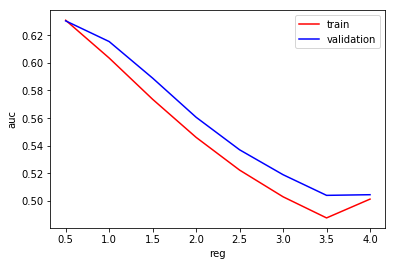

In [5]:
# 2.1
learner = ml.linearC.linearClassify()
linear_classfier_print(learner, XtS, Yt, XvS, Yv)

In [6]:
# 2.2
Xt2 = ml.transforms.fpoly(Xt, 2, bias=False)
Xv2 = ml.transforms.fpoly(Xv, 2, bias=False)
print(Xt2.shape[1])

# We originally have 14 features from x1 -> x14
# we pick 2 different from them to combine a new xi * xj feature, it will be 14 * 13 / 2 -> 91
# we convert every feature to its square  x1 -> x1 * x1 , it will be 14

# so, totally 14 + 14 + 91 = 119

119


/home/zhangjitao0405/uci-cs273/HW4/mltools/base.py:96: RuntimeWarning: divide by zero encountered in log
  return - np.mean( np.log( P[ np.arange(M), Y ] ) ) # evaluate
/home/zhangjitao0405/uci-cs273/HW4/mltools/linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )
/home/zhangjitao0405/uci-cs273/HW4/mltools/linearC.py:122: RuntimeWarning: invalid value encountered in true_divide
  sigx  = np.exp(respi) / (1.0+np.exp(respi))


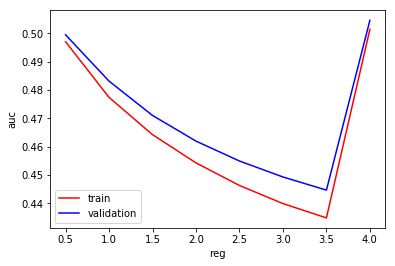

In [7]:
# 2.3
XtS2, params = ml.rescale(Xt2)
XvS2, _ = ml.rescale(Xv2, params)
learner_trans = ml.linearC.linearClassify()
linear_classfier_print(learner_trans, XtS2, Yt, XvS2, Yv)

###  Nearest Neighbors (20 points)

In [8]:
def nearest_neighbors_print(XtS, Yt, XvS, Yv):
    klist = [1, 5, 10, 50, 100, 200, 400] 
    tr_auc = []
    va_auc = []
    for k in klist:
        learner = ml.knn.knnClassify()
        learner.train(XtS, Yt, K=k, alpha=0.0)
        tr_auc.append(learner.auc(XtS, Yt))
        va_auc.append(learner.auc(XvS, Yv))
        
    plot(klist, tr_auc, va_auc, 'k')

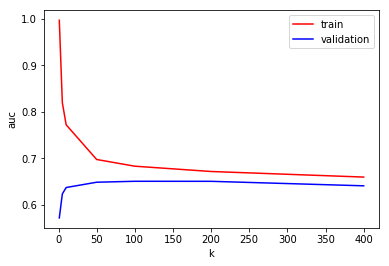

In [9]:
# 3.1
nearest_neighbors_print(XtS, Yt, XvS, Yv)

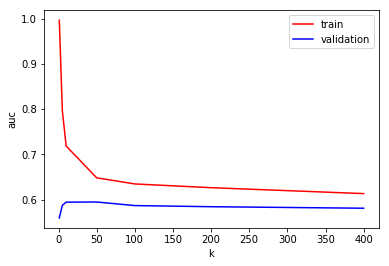

In [10]:
# 3.2
nearest_neighbors_print(Xt, Yt, Xv, Yv)

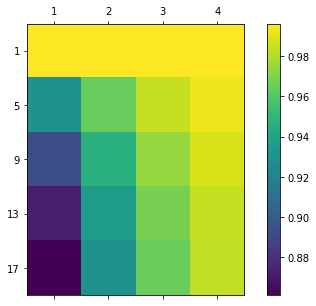

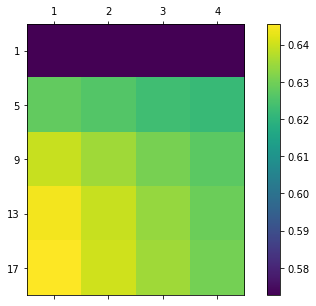

In [18]:
# 3.3
def plot_2d_auc(_2d_auc, x_list, y_list):
    f, ax = plt.subplots(1, 1, figsize=(8, 5))
    cax = ax.matshow(_2d_auc, interpolation='nearest')
    f.colorbar(cax)
    ax.set_xticklabels(['']+list(x_list))
    ax.set_yticklabels(['']+list(y_list))
    plt.show()
    
K = range(1,20,4)
A = range(1,5,1) # Or something else
tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))
for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner = ml.knn.knnClassify()
        learner.train(XtS, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(XtS, Yt)  # train learner using k and a
        va_auc[i][j] = learner.auc(XvS, Yv)
        
plot_2d_auc(tr_auc, A, K)
plot_2d_auc(va_auc, A, K)

I would recommand the K is 17 and a is 1

### Decision Trees (20 points)

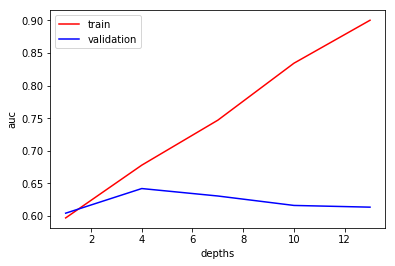

In [12]:
# 4.1
depths = range(1,15,3)
tr_auc = []
va_auc = []

for d in depths:
    learner = ml.dtree.treeClassify(XtS, Yt, maxDepth=d)
    tr_auc.append(learner.auc(XtS, Yt))
    va_auc.append(learner.auc(XvS, Yv))

plot(depths, tr_auc, va_auc, 'depths')

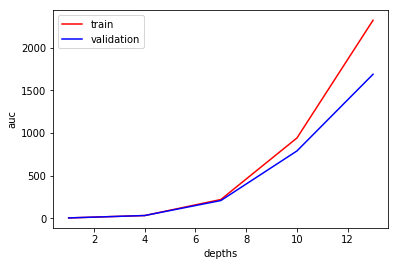

In [13]:
# 4.2
node_minParent_2 = []
node_minParent_4 = []

for d in depths:
    learner = ml.dtree.treeClassify(XtS, Yt, minParent=2, maxDepth=d)
    node_minParent_2.append(learner.sz)
    
    learner = ml.dtree.treeClassify(XtS, Yt, minParent=4, maxDepth=d)
    node_minParent_4.append(learner.sz)

plot(depths, node_minParent_2, node_minParent_4, 'depths')

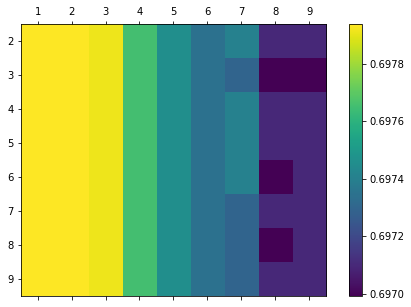

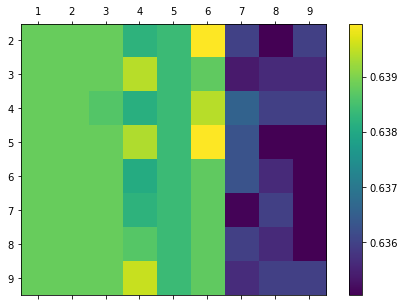

In [14]:
# 4.3
minParents = range(2,10,1)
minLeaves = range(1,10,1)

tr_auc = np.zeros((len(minParents),len(minLeaves)))
va_auc = np.zeros((len(minParents),len(minLeaves)))
for i,p in enumerate(minParents):
    for j,l in enumerate(minLeaves):
        learner = ml.dtree.treeClassify(XtS, Yt, maxDepth=5, minParent=p, minLeaf=l)
        tr_auc[i][j] = learner.auc(XtS, Yt)
        va_auc[i][j] = learner.auc(XvS, Yv)
        
plot_2d_auc(tr_auc, minLeaves, minParents)
plot_2d_auc(va_auc, minLeaves, minParents)

I would recommand the minParent is 5 and minLeaf is 6

### Neural Networks (20 points)

it 1 : Jsur = 0.4288143676366621, J01 = 0.3498
it 2 : Jsur = 0.4239632755196131, J01 = 0.3456
it 4 : Jsur = 0.4187788218961281, J01 = 0.3382
it 8 : Jsur = 0.419628948554538, J01 = 0.3402
it 16 : Jsur = 0.4201414410165782, J01 = 0.3358
it 32 : Jsur = 0.4209076331382794, J01 = 0.3358
it 64 : Jsur = 0.4217410449933179, J01 = 0.3358
it 1 : Jsur = 0.4583770472186758, J01 = 0.3358
it 2 : Jsur = 0.45199486546999634, J01 = 0.3358
it 4 : Jsur = 0.4481873398697302, J01 = 0.3358
it 8 : Jsur = 0.4467273769713889, J01 = 0.3358
it 16 : Jsur = 0.4462173647552678, J01 = 0.3358
it 32 : Jsur = 0.44609837124420865, J01 = 0.3358
it 64 : Jsur = 0.44608000171899403, J01 = 0.3358
it 1 : Jsur = 0.4583770471951559, J01 = 0.3358
it 2 : Jsur = 0.45199486533768085, J01 = 0.3358
it 4 : Jsur = 0.4481873398897029, J01 = 0.3358
it 8 : Jsur = 0.4467273771086681, J01 = 0.3358
it 16 : Jsur = 0.4462173651163337, J01 = 0.3358
it 32 : Jsur = 0.446098371861367, J01 = 0.3358
it 64 : Jsur = 0.44608000265079883, J01 = 0.3358
i

it 16 : Jsur = 0.4462173651163739, J01 = 0.3358
it 32 : Jsur = 0.44609837186127216, J01 = 0.3358
it 64 : Jsur = 0.4460800026508202, J01 = 0.3358
it 1 : Jsur = 0.4583770473468667, J01 = 0.3358
it 2 : Jsur = 0.45199486533725913, J01 = 0.3358
it 4 : Jsur = 0.4481873398992363, J01 = 0.3358
it 8 : Jsur = 0.44672737711192706, J01 = 0.3358
it 16 : Jsur = 0.4462173651182413, J01 = 0.3358
it 32 : Jsur = 0.44609837186217355, J01 = 0.3358
it 64 : Jsur = 0.4460800026509587, J01 = 0.3358
it 1 : Jsur = 0.4583770475154636, J01 = 0.3358
it 2 : Jsur = 0.451994865373, J01 = 0.3358
it 4 : Jsur = 0.448187339893602, J01 = 0.3358
it 8 : Jsur = 0.44672737710966287, J01 = 0.3358
it 16 : Jsur = 0.44621736511658383, J01 = 0.3358
it 32 : Jsur = 0.4460983718615376, J01 = 0.3358
it 64 : Jsur = 0.44608000265086367, J01 = 0.3358
it 1 : Jsur = 0.42602123889920185, J01 = 0.3308
it 2 : Jsur = 0.41822972189116353, J01 = 0.3226
it 4 : Jsur = 0.4139285790624123, J01 = 0.318
it 8 : Jsur = 0.410495040550343, J01 = 0.3118
it

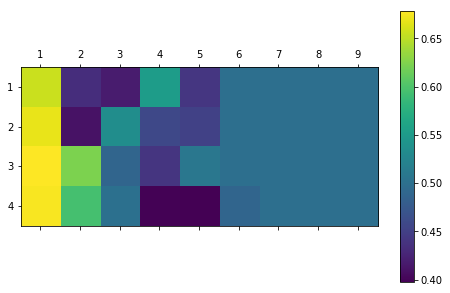

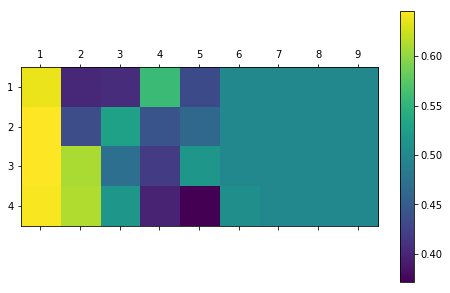

In [15]:
# 5.1    
nodes = range(1,5,1)
layers = range(1,10,1)
tr_auc = np.zeros((len(nodes),len(layers)))
va_auc = np.zeros((len(nodes),len(layers)))
for i,n in enumerate(nodes):
    for j,l in enumerate(layers):
        nn = ml.nnet.nnetClassify()
        nn.init_weights([XtS.shape[1]] + [n for x in range(1,l+1)] + [2], 'random', XtS, Yt)
        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=100) # 100 is fast to train and have good loss
        tr_auc[i][j] = nn.auc(XtS, Yt)
        va_auc[i][j] = nn.auc(XvS, Yv)

plot_2d_auc(tr_auc, layers, nodes)
plot_2d_auc(va_auc, layers, nodes)

I would recommand node in each layer is 4 and layer is 1

In [16]:
# 5.2
def sig(z): return np.atleast_2d(z)
def dsig(z): return np.atleast_2d(1)

def activation_switch(name):
    nn = ml.nnet.nnetClassify()
    nn.init_weights([XtS.shape[1],5,2], 'random', XtS, Yt) 
    nn.setActivation(name, sig, dsig)
    nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
    print(name + " trian auc:",nn.auc(XtS,Yt))
    print(name + " validation auc:",nn.auc(XvS,Yv))
    print('--------------------------------------')

activation_switch('custom')
activation_switch('logistic')
activation_switch('htangent')

it 1 : Jsur = 0.4282136543634937, J01 = 0.3156
it 2 : Jsur = 0.42093814223664777, J01 = 0.3118
it 4 : Jsur = 0.4144330867408389, J01 = 0.308
it 8 : Jsur = 0.41066736183976166, J01 = 0.3038
it 16 : Jsur = 0.40858058227351185, J01 = 0.3026
it 32 : Jsur = 0.4078519729171966, J01 = 0.3028
it 64 : Jsur = 0.4076626319507943, J01 = 0.3066
it 128 : Jsur = 0.40762231430005724, J01 = 0.3068
custom trian auc: 0.6689316582134123
custom validation auc: 0.647759861076656
--------------------------------------
it 1 : Jsur = 0.42766468258506174, J01 = 0.3332
it 2 : Jsur = 0.4190564835364335, J01 = 0.3184
it 4 : Jsur = 0.4160874228735016, J01 = 0.3114
it 8 : Jsur = 0.4157725910679841, J01 = 0.3114
it 16 : Jsur = 0.41636097122693916, J01 = 0.3104
it 32 : Jsur = 0.4171513858306903, J01 = 0.3358
it 64 : Jsur = 0.4179114980966551, J01 = 0.3358
it 128 : Jsur = 0.4185894457631168, J01 = 0.3358
it 256 : Jsur = 0.4191892440683062, J01 = 0.3358
logistic trian auc: 0.6613389732600258
logistic validation auc: 0.6

In this case, the custom activation is better than the logistic activation and a little worse than the htangent activation.

### Conclusions (5 points)

In [21]:
# I prefer the decision tree, my name is Jitao, and my leaderboard is 
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
learner = ml.dtree.treeClassify(X, Y, maxDepth=5, minParent=2, minLeaf=6)
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')
print('finished')

finished


### Statement of Collaboration (5 points)

I did my homework independently.